<a href="https://colab.research.google.com/github/KevinEnriquez96/Analogos/blob/master/KevinEnriquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#%tensorflow_version 1.x
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#from tensorflow.keras import backend as K
#from statsmodels.tsa.api import SimpleExpSmoothing
#from matplotlib.pylab import rcParams
#from statsmodels.tsa.stattools import adfuller
#import keras
#from keras.layers import Dense , Flatten,BatchNormalization
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.optimizers import Adam
#import itertools

Señales EMG sin filtrar

In [124]:
df=pd.read_csv('sheet1.csv')
#f=pd.read_csv('/content/y.csv')
#df=df.drop(['TIME'],axis=1)
df.head(100)

,atencion,theta,low alp,high alp
0,47,36635,5916,8999
1,53,62061,25303,29206
2,61,39997,5644,9869
3,56,49175,33589,56360
4,54,58528,25452,17947
...,...,...,...,...
95,37,16183,18114,48406
96,23,60505,49990,24162
97,24,42545,34835,16239
98,50,23368,7507,8035


In [125]:
x1 = df.values
xv = x1.reshape(315,4)
df1 = pd.DataFrame(xv)


Gráfica de señales

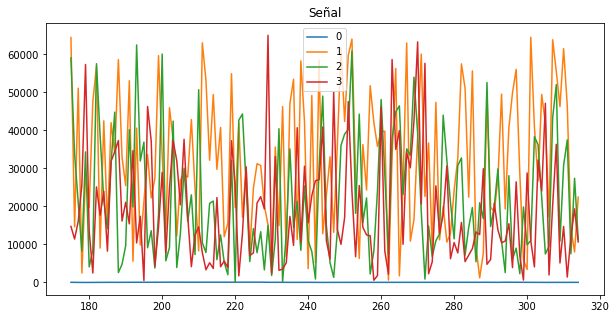

In [126]:
df1[175:350].plot(figsize=(10,5))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

Análisis de datos

In [127]:
signal1=df['atencion']
signal2=df['theta ']
signal3=df['low alp']
signal4=df['high alp ']
#df1=df.drop(['TIME','EMG2','EMG3'],axis=1)
#df2=df.drop(['TIME','EMG1','EMG3'],axis=1)
#df3=df.drop(['TIME','EMG1','EMG2'],axis=1)

df1=df.drop(['theta ','low alp','high alp '],axis=1)
df2=df.drop(['atencion','low alp','high alp '],axis=1)
df3=df.drop(['atencion','theta ','high alp '],axis=1)
df4=df.drop(['atencion','theta ','low alp'],axis=1)

In [128]:
df[:500].describe()

,atencion,theta,low alp,high alp
count,315.000000,315.000000,315.000000,315.000000
mean,46.425397,33387.901587,23430.660317,20641.961905
std,20.934155,18306.624768,17610.272792,15662.852581
min,1.000000,391.000000,88.000000,506.000000
25%,30.000000,19112.000000,8768.500000,8277.500000
50%,47.000000,32443.000000,19041.000000,16114.000000
75%,61.000000,48855.500000,37784.000000,29988.000000
max,97.000000,65278.000000,64858.000000,65435.000000


Grafica de columnas por sensor

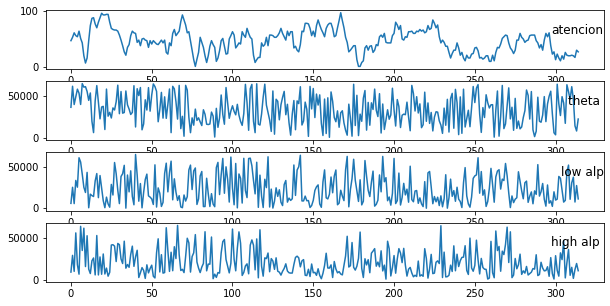

In [129]:
groups = [0,1,2,3]
i = 1
# plot each column
plt.figure(figsize=(10,5))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Filtro - Suavizado exponencial

In [130]:
from pandas.core.indexes.numeric import Float64Index
from pandas.core.arrays.datetimelike import round_nsint64
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

errores=[]
for i in np.arange(0,1.1,0.1):
  i=round(i,1)
  f1=SimpleExpSmoothing(signal1).fit(smoothing_level=i, optimized=False)
  r1=f1.fittedvalues
  df1['Pronostico alfa='+str(i)]=r1
  f2=SimpleExpSmoothing(signal2).fit(smoothing_level=i, optimized=False)
  r2=f2.fittedvalues
  df2['Pronostico alfa='+str(i)]=r2
  f3=SimpleExpSmoothing(signal3).fit(smoothing_level=i, optimized=False)
  r3=f3.fittedvalues
  df3['Pronostico alfa='+str(i)]=r3
  f4=SimpleExpSmoothing(signal4).fit(smoothing_level=i, optimized=False)
  r4=f4.fittedvalues
  df4['Pronostico alfa='+str(i)]=r4
  

  
  #df['Error alfa= '+str(i)]= df['TIME']-df['Pronostico alfa='+str(i)]
  #df['Error2 alfa= '+str(i)]= pow(df['Error alfa= '+str(i)],2)
  #suma=df['Error2 alfa= '+str(i)].sum()
  #df.plot(x='TIME',y='Pronostico alfa='+str(i),ax=ax)
  #errores.append(suma)
print(errores)

[]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


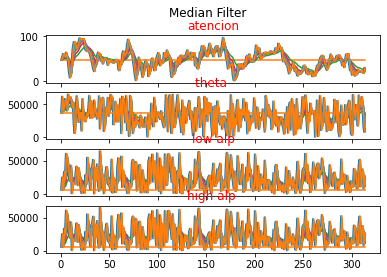

In [131]:
f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle('Median Filter')

plt_arr[0].plot(df1)
plt_arr[0].set_title("atencion", color ='red')

plt_arr[1].plot(df2)
plt_arr[1].set_title("theta ", color ='red')

plt_arr[2].plot(df3)
plt_arr[2].set_title("low alp", color ='red')

plt_arr[3].plot(df3)
plt_arr[3].set_title("high alp ", color ='red')

plt.show()

#df1.plot(figsize=(15,10))
#df2['Pronostico alfa=0.2'].plot(figsize=(15,10))
#df3.plot(figsize=(15,10))

Filtro - Media movil

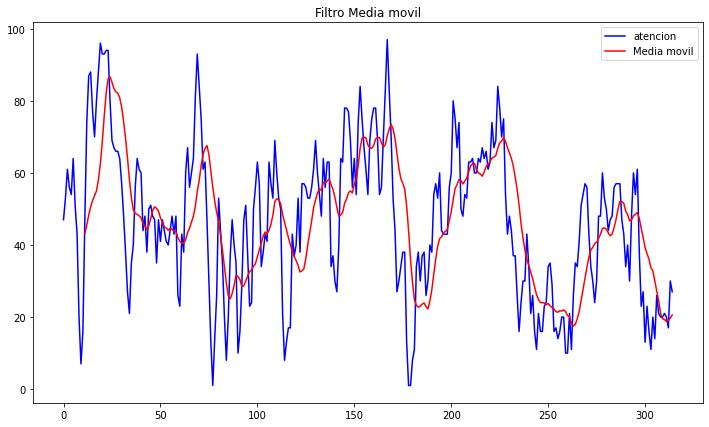

In [132]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()

df1['atencion'][:500].plot(figsize=(12,7),color='blue')
moving_avg1[:500].plot(label='Media movil',color='red')
plt.title('Filtro Media movil')
plt.legend(loc='best')
#ylabel('mV')
#xlabel('t')

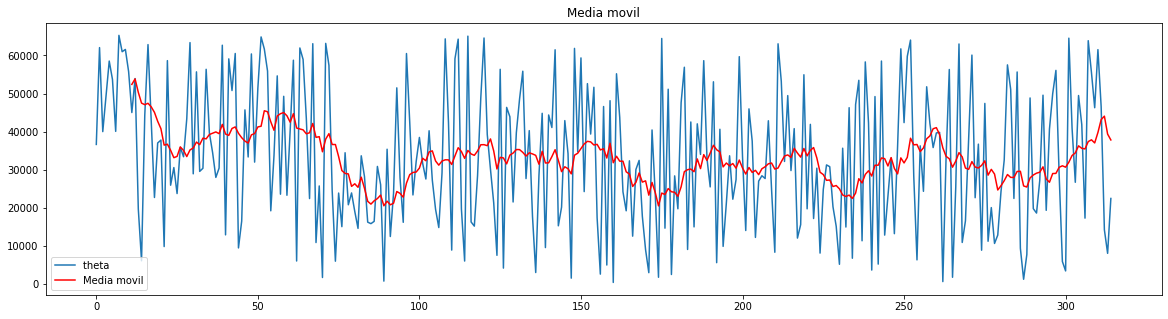

In [133]:
df2['theta '].plot(figsize=(20,5))
moving_avg2.plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

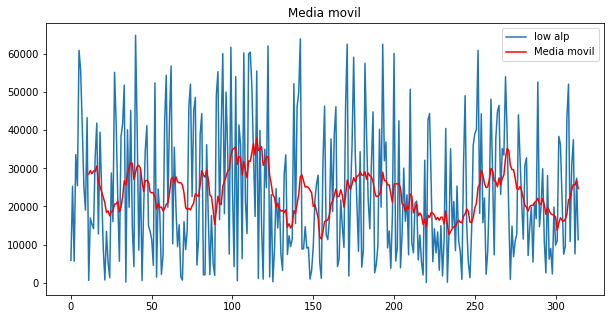

In [134]:
df3['low alp'].plot(figsize=(10,5))
moving_avg3.plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

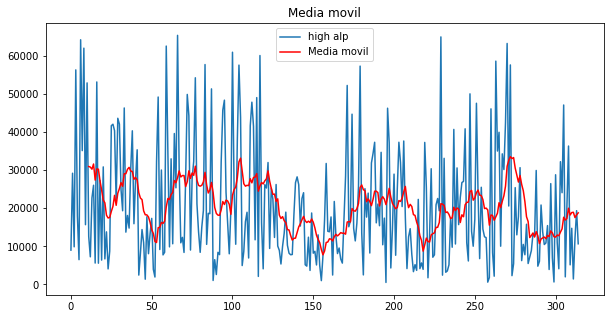

In [135]:
df4['high alp '].plot(figsize=(10,5))
moving_avg4.plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

Filtro - Savitzky golay

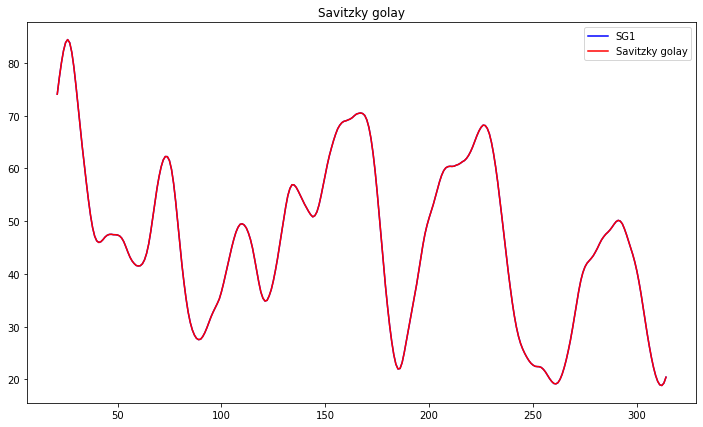

In [137]:
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
#5,2
#51,3

SG1=savgol_filter(moving_avg1, 21, 3)
df1['SG1']=SG1
SG2=savgol_filter(moving_avg2, 21, 3)
df2['SG2']=SG2
SG3=savgol_filter(moving_avg3, 21, 3)
df3['SG3']=SG3

df1['SG1'][:500].plot(figsize=(12,7),color='blue')
#moving_avg1[:500].plot(label='Media movil',color='blue')
df1['SG1'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

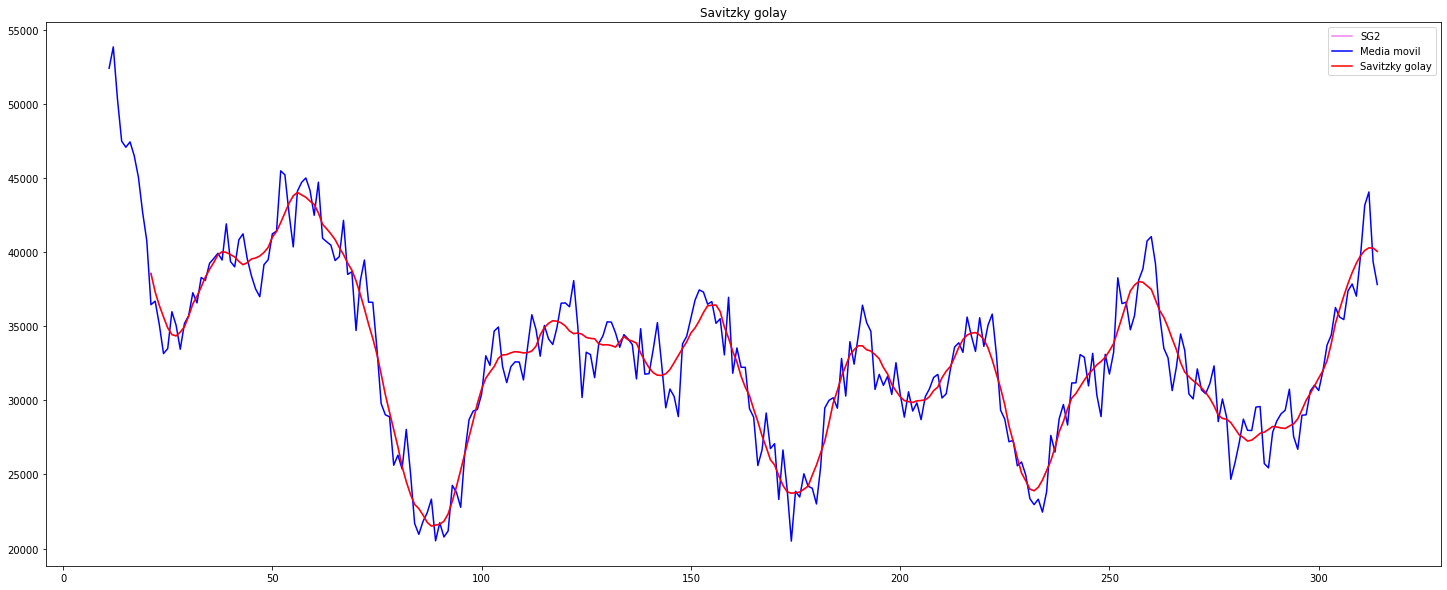

In [138]:
df2['SG2'].plot(figsize=(25,10),color='violet')
moving_avg2.plot(label='Media movil',color='blue')
df2['SG2'].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

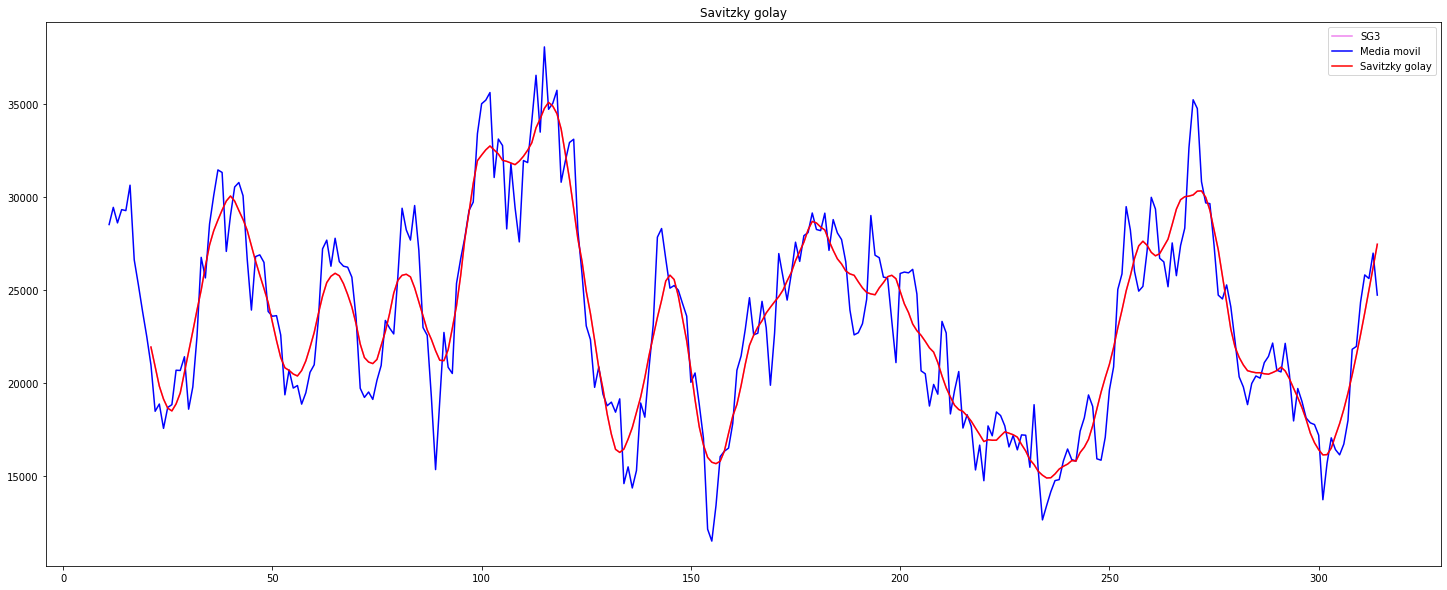

In [141]:
df3['SG3'][:500].plot(figsize=(25,10),color='violet')
moving_avg3[:500].plot(label='Media movil',color='blue')
df3['SG3'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

In [140]:
df5=pd.DataFrame()
df5['EMG1']=SG1
df5['EMG2']=SG2
df5['EMG3']=SG3
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('BDDFSG.csv')
df5.describe()

,EMG1,EMG2,EMG3
count,294.000000,294.000000,294.000000
mean,46.490937,32597.965822,23244.401395
std,15.458070,5047.440534,4879.379033
min,18.850483,21518.336766,14874.083197
25%,35.064373,29366.904673,19455.678285
50%,46.904203,32969.052359,22930.146657
75%,57.474733,35368.078818,26480.220803
max,84.437943,44024.947532,35068.279530


Filtro FIR

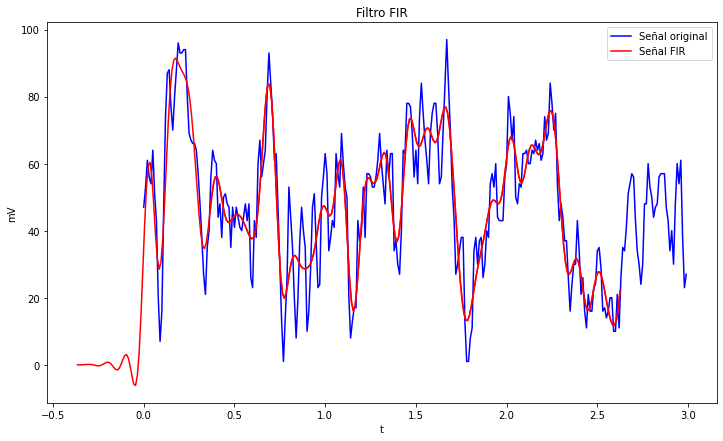

In [142]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(12,7))
# Plot the original signal.
plot(t, signal1[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal original', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

In [143]:
df11=pd.DataFrame(df1['FIR1'])
df11.describe()

,FIR1
count,315.000000
mean,42.273749
std,23.372305
min,-6.179149
25%,27.698289
50%,44.050020
75%,59.800598
max,91.453446
